# EDA On moivelens Dataset

## Introduction

#### This notebook provides a thorough exploratory data analysis (EDA) of the MovieLens ratings dataset, focusing on userId, movieId, and Rating. The goal is to uncover patterns and insights that can inform further modeling or recommendation system development.

## 1. Data Loading and Initial Exploration

#### We load the ratings data and inspect its structure.

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
ratings = pd.read_csv(r"C:\Users\DELL\recsys\data\ratings.csv")
movies = pd.read_csv(r"C:\Users\DELL\recsys\data\movies.csv")

In [10]:
print("Ratings:\n", ratings.head())
print("\nMovies:\n", movies.head())

Ratings:
    userId  movieId  rating  timestamp
0       1        1     4.0  964982703
1       1        3     4.0  964981247
2       1        6     4.0  964982224
3       1       47     5.0  964983815
4       1       50     5.0  964982931

Movies:
    movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|Romance  
4                                       Comedy  


## 2: Data Cleaning

#### We check for missing values and ensure data types are appropriate.

In [15]:
movies = movies.dropna()
movies = movies.drop_duplicates()

In [17]:
ratings = ratings.dropna()
ratings = ratings.drop_duplicates()

In [19]:
print("Ratings shape:", ratings.shape)
print("Movies shape:", movies.shape)

Ratings shape: (100836, 4)
Movies shape: (9742, 3)


# 3.Exploratory Data Analysis (EDA)

## 1.Cold-Start Problem Analysis

#### 
The cold-start problem refers to users or movies with very few ratings, making it difficult for recommendation systems to make accurate predictions for them. Identifying the extent of this issue helps in designing strategies to handle such cases.

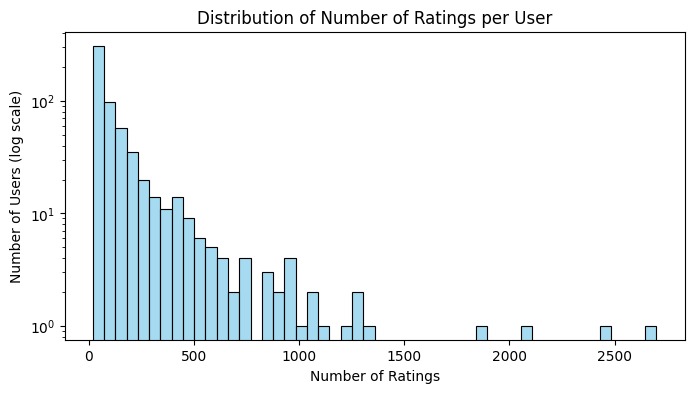

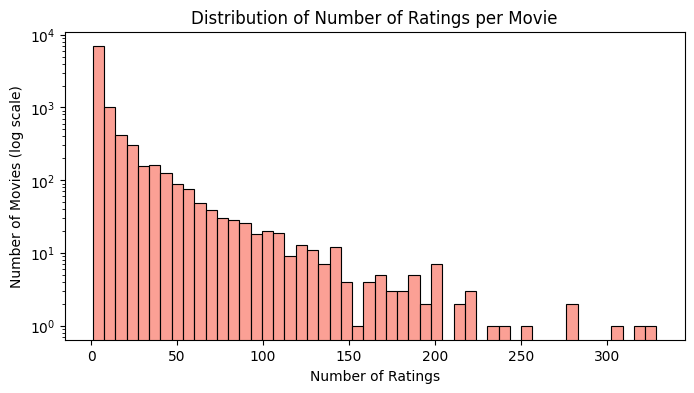

In [24]:
# Count ratings per user and per movie
user_rating_counts = ratings['userId'].value_counts()
movie_rating_counts = ratings['movieId'].value_counts()

# Visualize users with very few ratings
plt.figure(figsize=(8,4))
sns.histplot(user_rating_counts, bins=50, log=True, color='skyblue')
plt.title('Distribution of Number of Ratings per User')
plt.xlabel('Number of Ratings')
plt.ylabel('Number of Users (log scale)')
plt.show()

# Visualize movies with very few ratings
plt.figure(figsize=(8,4))
sns.histplot(movie_rating_counts, bins=50, log=True, color='salmon')
plt.title('Distribution of Number of Ratings per Movie')
plt.xlabel('Number of Ratings')
plt.ylabel('Number of Movies (log scale)')
plt.show()

#### Interpretation:
-These histograms show that a large number of users and movies have very few ratings, confirming the presence of a cold-start problem. 
-This is a common challenge in recommendation systems and suggests the need for special strategies (like content-based filtering or hybrid models) for new users and movies.

## 2. Most/Least Rated Movies and Users

#### Identifying the most and least rated movies and users helps understand engagement patterns and can highlight popular or niche content.

C:\Users\DELL\AppData\Local\Temp\ipykernel_19700\2988064199.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='num_ratings', y='title', data=top_movies_df, palette='viridis')


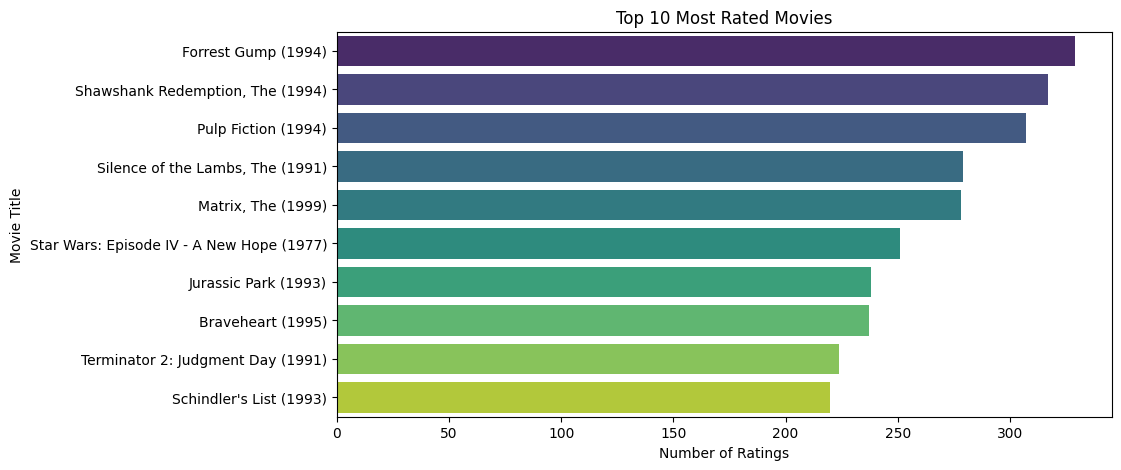

Sample of least rated movies:
   movieId  num_ratings                                              title
0     6163            1  He Loves Me... He Loves Me Not (À la folie... ...
1     6603            1                              Double Life, A (1947)
2   127319            1                                    The Loft (2014)
3   127194            1                                 The D Train (2015)
4     6178            1                            Patch of Blue, A (1965)
5     6609            1  Gospel According to St. Matthew, The (Vangelo ...
6   128592            1                           The Boy Next Door (2015)
7    25996            1                             Star Is Born, A (1954)
8    82857            1                                  Sweetgrass (2009)
9     6101            1                                     Missing (1982)


C:\Users\DELL\AppData\Local\Temp\ipykernel_19700\2988064199.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_users.index.astype(str), y=top_users.values, palette='magma')


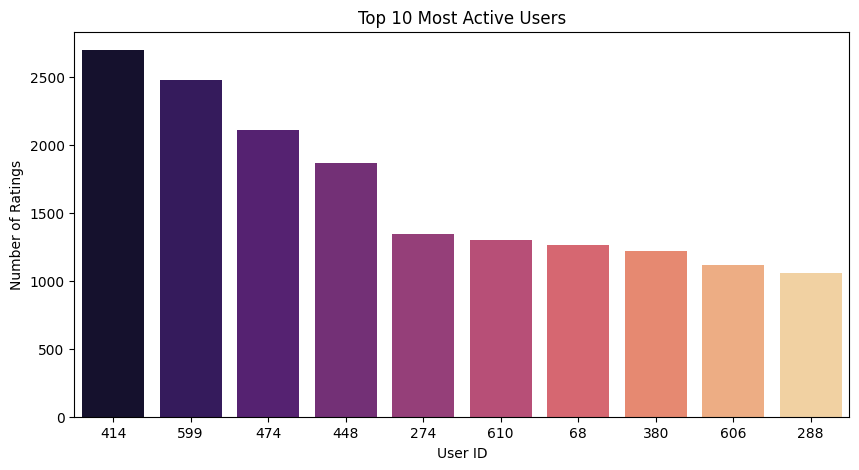

In [29]:
# Most rated movies
top_movies = movie_rating_counts.head(10)
top_movies_df = pd.DataFrame({'movieId': top_movies.index, 'num_ratings': top_movies.values})
top_movies_df = top_movies_df.merge(movies[['movieId', 'title']], on='movieId', how='left')

plt.figure(figsize=(10,5))
sns.barplot(x='num_ratings', y='title', data=top_movies_df, palette='viridis')
plt.title('Top 10 Most Rated Movies')
plt.xlabel('Number of Ratings')
plt.ylabel('Movie Title')
plt.show()

# Least rated movies (with at least 1 rating)
bottom_movies = movie_rating_counts[movie_rating_counts == 1].head(10)
bottom_movies_df = pd.DataFrame({'movieId': bottom_movies.index, 'num_ratings': bottom_movies.values})
bottom_movies_df = bottom_movies_df.merge(movies[['movieId', 'title']], on='movieId', how='left')
print('Sample of least rated movies:')
print(bottom_movies_df)

# Most active users
top_users = user_rating_counts.head(10)
plt.figure(figsize=(10,5))
sns.barplot(x=top_users.index.astype(str), y=top_users.values, palette='magma')
plt.title('Top 10 Most Active Users')
plt.xlabel('User ID')
plt.ylabel('Number of Ratings')
plt.show()

#### Interpretation:
-The bar plots and tables highlight which movies and users are most and least active in the dataset. 
-This can inform strategies for engagement and help identify influential users or popular content.

## 3.Correlation Analysis: User Activity vs. Average Rating

#### This analysis checks if there is a relationship between how active a user is (number of ratings) and their average rating. This can reveal if more active users are more critical or generous.


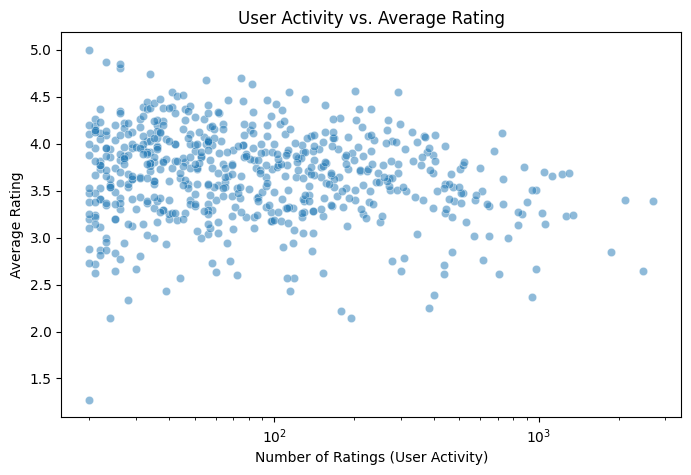

Correlation between user activity and average rating: -0.199


In [34]:
user_stats = ratings.groupby('userId').agg(num_ratings=('rating', 'count'), avg_rating=('rating', 'mean'))
plt.figure(figsize=(8,5))
sns.scatterplot(x='num_ratings', y='avg_rating', data=user_stats, alpha=0.5)
plt.title('User Activity vs. Average Rating')
plt.xlabel('Number of Ratings (User Activity)')
plt.ylabel('Average Rating')
plt.xscale('log')
plt.show()

# Calculate correlation
correlation = user_stats['num_ratings'].corr(user_stats['avg_rating'])
print(f'Correlation between user activity and average rating: {correlation:.3f}')

#### Interpretation:-
The scatter plot and correlation value show whether there is a trend between user activity and their average rating.
- A weak or near-zero correlation suggests that activity level does not strongly influence rating behavior, while a positive or negative value would indicate a trend.

## 4.Movie Rating Variance vs. Popularity

#### This analysis explores the relationship between a movie’s popularity (measured by the number of ratings it receives) and the variability of its ratings (standard deviation). Movies with high variance in ratings may be more controversial or polarizing, while those with low variance tend to have more consensus among viewers.

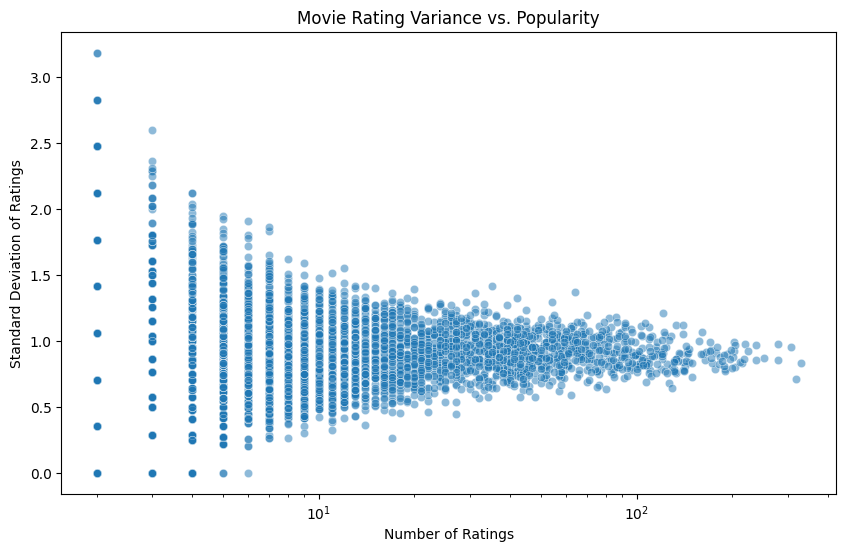

In [39]:
movie_stats = ratings.groupby('movieId').agg({'rating': ['count', 'mean', 'std']})
movie_stats.columns = ['num_ratings', 'avg_rating', 'std_rating']
plt.figure(figsize=(10,6))
sns.scatterplot(x='num_ratings', y='std_rating', data=movie_stats, alpha=0.5)
plt.title('Movie Rating Variance vs. Popularity')
plt.xlabel('Number of Ratings')
plt.ylabel('Standard Deviation of Ratings')
plt.xscale('log')
plt.show()

#### Interpretation:-This scatter plot illustrates the relationship between a movie’s popularity (number of ratings) and the variability of its ratings (standard deviation). 
-Movies with very few ratings often show high variance, as a small number of opinions can differ widely. As the number of ratings increases, the variance generally decreases, indicating that popular movies tend to have more consensus among viewers. 
-However, some popular movies still exhibit high variance, suggesting they are polarizing or controversial. This insight is valuable for recommendation systems, as it highlights which movies may have divided audience opinions..

## 5.User-Movie Matrix Sparsity Visualization

#### The user-movie rating matrix is typically very sparse, meaning most users have rated only a small fraction of all available movies. Visualizing this sparsity helps us understand the challenges in building recommendation systems, as most of the matrix is empt

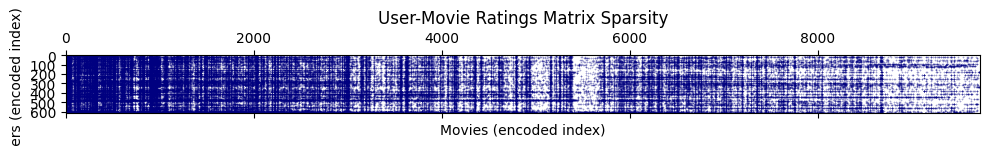

In [44]:
import scipy.sparse

user_codes = ratings['userId'].astype('category').cat.codes
movie_codes = ratings['movieId'].astype('category').cat.codes
sparse_matrix = scipy.sparse.coo_matrix((ratings['rating'], (user_codes, movie_codes)))

plt.figure(figsize=(10, 6))
plt.spy(sparse_matrix, markersize=0.1, color='navy')
plt.title('User-Movie Ratings Matrix Sparsity')
plt.xlabel('Movies (encoded index)')
plt.ylabel('Users (encoded index)')
plt.tight_layout()
plt.show()

#### Interpretation:
-This plot visualizes the sparsity of the user-movie ratings matrix, where each dot represents a rating given by a user to a movie. 
-The vast majority of the matrix is empty, indicating that most users have rated only a small fraction of all available movies. 
-This extreme sparsity is a fundamental challenge in building recommendation systems, as it means there is limited overlap in user preferences, making it harder to find similarities and make accurate predictions.

### 6.Outlier Analysis: Users with Extreme Average Ratings

#### Some users consistently give very high or very low ratings, which can introduce bias into the dataset. Identifying these outlier users is important for understanding potential sources of skew in your data and for building robust recommendation systems.

In [49]:
user_avg = ratings.groupby('userId')['rating'].mean()
outliers = user_avg[(user_avg < 2) | (user_avg > 4.5)]
print('Users with extreme average ratings:')
print(outliers)

Users with extreme average ratings:
userId
25     4.807692
30     4.735294
43     4.552632
53     5.000000
122    4.546233
171    4.634146
251    4.869565
348    4.672727
371    4.548780
400    4.511628
441    4.522222
442    1.275000
452    4.556931
515    4.846154
523    4.693333
Name: rating, dtype: float64


#### Interpretation:-
This analysis identifies users who consistently give very low (below 2) or very high (above 4.5) average ratings.
- These users are outliers and may represent individuals with unique or extreme preferences, or possibly users who rate movies in a non-standard way (e.g., only rating favorites or only rating poorly).
- Recognizing these outliers is important, as their ratings can skew overall statistics and may require special handling in recommendation algorithms to avoid biasing results.


### 7.Cumulative Distribution Function (CDF) of Ratings

#### A CDF plot shows the proportion of ratings that are less than or equal to a given value. This helps us understand the overall distribution and skewness of the ratings, and whether users tend to give higher or lower ratings.

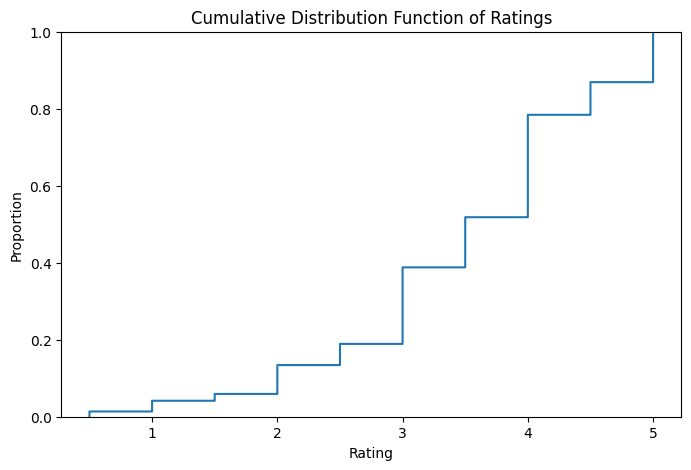

In [54]:
plt.figure(figsize=(8,5))
sns.ecdfplot(ratings['rating'])
plt.title('Cumulative Distribution Function of Ratings')
plt.xlabel('Rating')
plt.ylabel('Proportion')
plt.show()

#### Interpretation-
The CDF plot shows the cumulative proportion of ratings at or below each rating value.
- A steep rise at higher ratings indicates that a large proportion of ratings are high, suggesting a positive bias in user ratings.
- This is common in many recommendation datasets, where users are more likely to rate movies they enjoyed
- Understanding this distribution is crucial for interpreting average ratings and for designing algorithms that account for such biases..

## Conclusion :-
Explored the distribution and trends of ratings over time and byuser activity-.
Identified cold-start problems, with many users and movies having very few rating-s.
Highlighted the most and least active users and movies, revealing engagement patter-ns.
Found that the user-movie matrix is extremely sparse, a key challenge for recommendation syst-ems.
Analyzed the relationship between user activity and average rating, f -0.199 h-tions.
Detected outlier users and examined the overall distribution of 
-This EDA provides a solid foundation for building and evaluating recommendation systems using the MovieLens dataset.
ratings.